In [167]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [168]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

### Generate the Cities List by Using the `citipy` Library

In [169]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

---

In [170]:
city_weather = requests.get(city_url)
weather = city_weather.json()
weather

{'coord': {'lon': 10.5225, 'lat': 57.3319},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 7.51,
  'feels_like': 4.56,
  'temp_min': 7.51,
  'temp_max': 7.51,
  'pressure': 1017,
  'humidity': 86,
  'sea_level': 1017,
  'grnd_level': 1015},
 'visibility': 10000,
 'wind': {'speed': 4.81, 'deg': 213, 'gust': 9.18},
 'rain': {'1h': 0.12},
 'clouds': {'all': 100},
 'dt': 1730092104,
 'sys': {'country': 'DK', 'sunrise': 1730096459, 'sunset': 1730130129},
 'timezone': 3600,
 'id': 2614172,
 'name': 'Sæby',
 'cod': 200}

In [171]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | kailua-kona
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | raja
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | belyy yar
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | nyurba
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | brookings
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | meulaboh
Processing Record 19 of Set 1 | salinopolis
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | hawaiian paradise park
Processing Record 22 of 

In [172]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [173]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,15.73,91,87,0.89,ZA,1730092105
1,kailua-kona,19.6406,-155.9956,23.66,95,100,0.45,US,1730092106
2,codrington,-38.2667,141.9667,14.64,59,52,5.80,AU,1730092107
3,puerto natales,-51.7236,-72.4875,6.82,91,100,7.26,CL,1730092108
4,adamstown,-25.0660,-130.1015,21.38,81,39,4.21,PN,1730092109


In [174]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [175]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,15.73,91,87,0.89,ZA,1730092105
1,kailua-kona,19.6406,-155.9956,23.66,95,100,0.45,US,1730092106
2,codrington,-38.2667,141.9667,14.64,59,52,5.80,AU,1730092107
3,puerto natales,-51.7236,-72.4875,6.82,91,100,7.26,CL,1730092108
4,adamstown,-25.0660,-130.1015,21.38,81,39,4.21,PN,1730092109


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

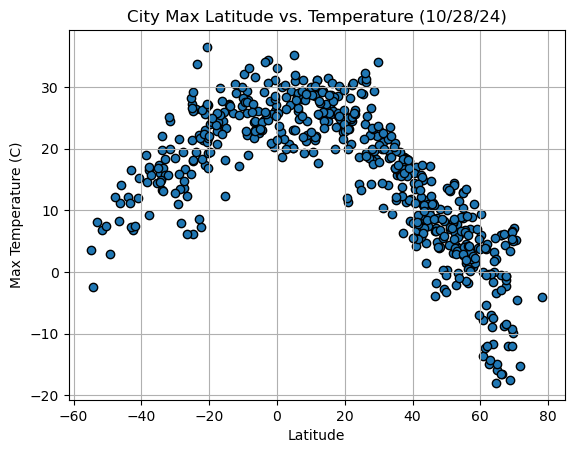

In [176]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o"
           )

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

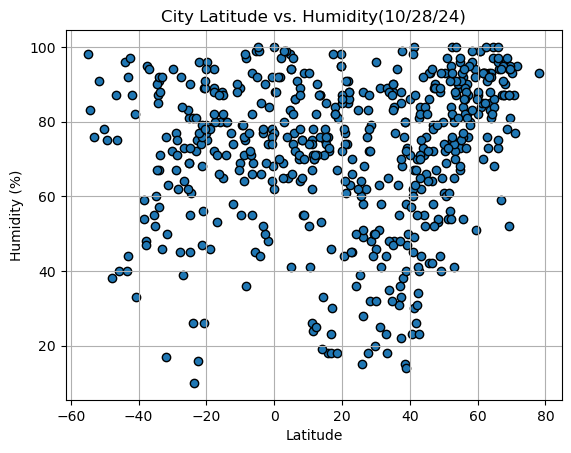

In [177]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
           edgecolor="black", linewidth=1, marker="o"
           )

# Incorporate the other graph proerties
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

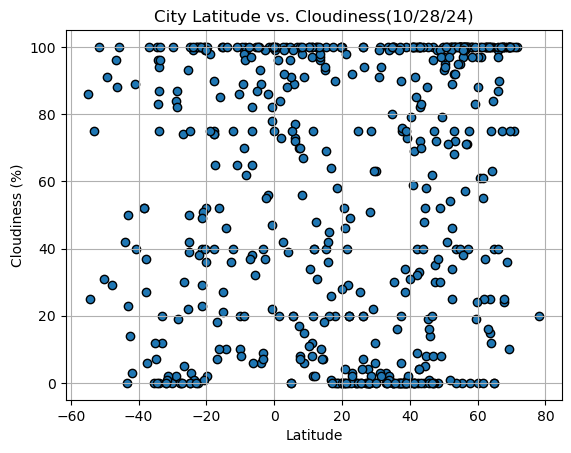

In [178]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
           edgecolor="black", linewidth=1, marker="o"
           )

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

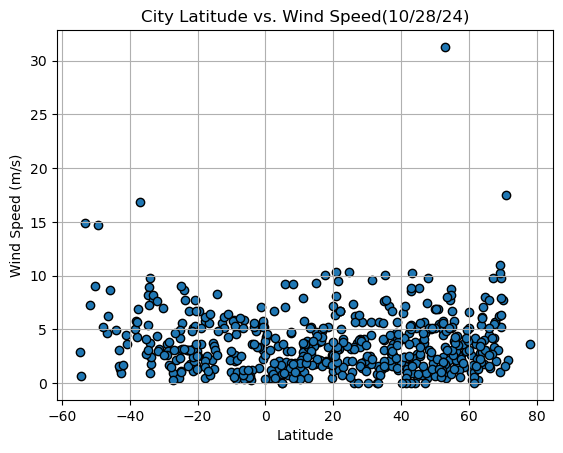

In [179]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
           edgecolor="black", linewidth=1, marker="o"
         )

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [180]:
# Define a function to create Linear Regression plots
def lat_regression(dataframe,y_column):
    # set x and y vales
    x_value = dataframe["Lat"]
    y_value = dataframe[y_column] 
    
    # Create Scatter plot
    plt.scatter(x_value,y_value)
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_value,y_value)

    # Use lineregress for linear regression values
    regress_values = x_value * slope + intercept 
    
    # line equation
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,(dataframe["Lat"].min(),dataframe[y_column].min()),fontsize=15,color="red")
    plt.title(f"Latitude vs {y_column}(%s)" % time.strftime("%x"))
    plt.xlabel("Latitutde")
    plt.ylabel(y_column)
    print(f"The r^2 value is: {rvalue**2}")
    plt.show() # display chart

In [181]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kailua-kona,19.6406,-155.9956,23.66,95,100,0.45,US,1730092106
5,raja,8.4596,25.6780,21.17,55,67,1.37,SS,1730092110
6,qaqortoq,60.7167,-46.0333,0.06,99,100,2.60,GL,1730092112
7,isafjordur,66.0755,-23.1240,-0.45,73,99,4.44,IS,1730092113
8,tiksi,71.6872,128.8694,-15.31,95,100,2.10,RU,1730092114


In [182]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,15.73,91,87,0.89,ZA,1730092105
2,codrington,-38.2667,141.9667,14.64,59,52,5.80,AU,1730092107
3,puerto natales,-51.7236,-72.4875,6.82,91,100,7.26,CL,1730092108
4,adamstown,-25.0660,-130.1015,21.38,81,39,4.21,PN,1730092109
10,blackmans bay,-43.0167,147.3167,16.52,44,50,1.34,AU,1730092116


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7728232304941905


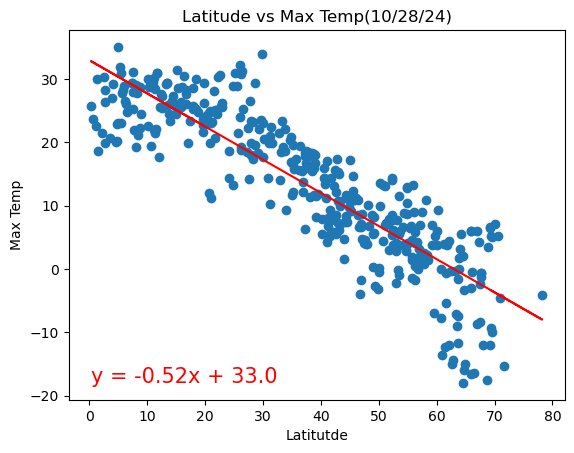

In [183]:
# Linear regression on Northern Hem
lat_regression(northern_hem_df, "Max Temp")

The r^2 value is: 0.5637616307089135


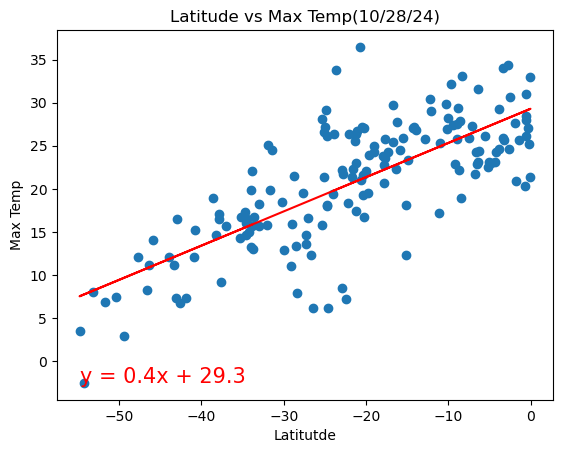

In [184]:
# Linear regression on Southern Hemisphere
lat_regression(southern_hem_df, "Max Temp")

**Discussion about the linear relationship:** Theres a high correlation between lattitude and temperatures for the cities in the nothern hemisphere. You can also say the opposite for the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.058448255852481604


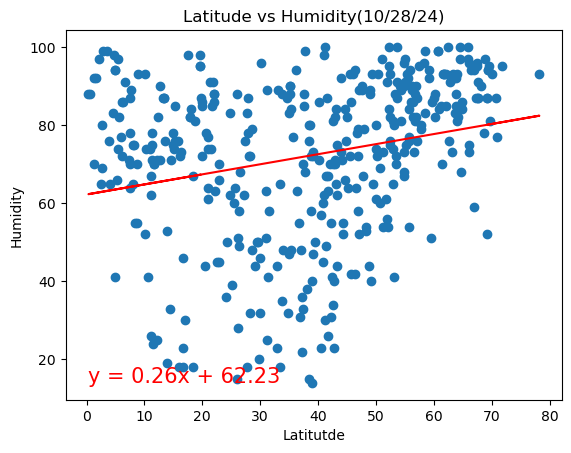

In [185]:
# Northern Hemisphere
lat_regression(northern_hem_df, "Humidity")

The r^2 value is: 0.0066130081132365045


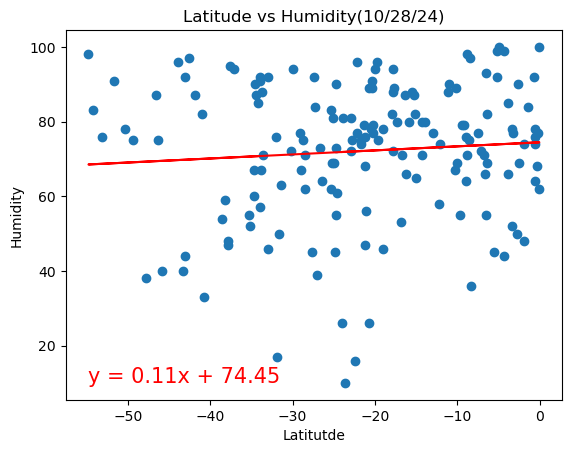

In [186]:
# Southern Hemisphere
lat_regression(southern_hem_df, "Humidity")

**Discussion about the linear relationship:** There is a moderate correclation between the humidity level and latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.04166797802593419


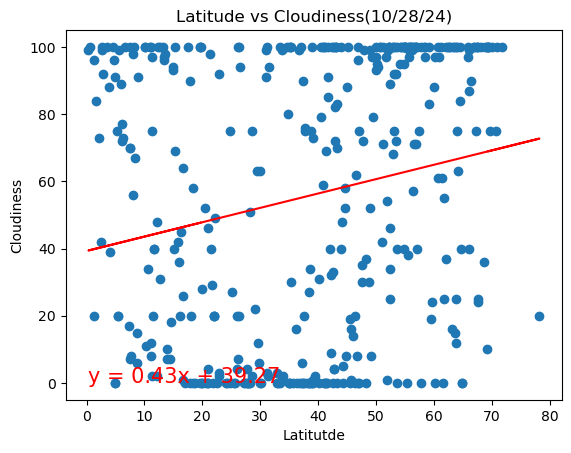

In [187]:
# Northern Hemisphere
lat_regression(northern_hem_df, "Cloudiness")

The r^2 value is: 0.032766436741674225


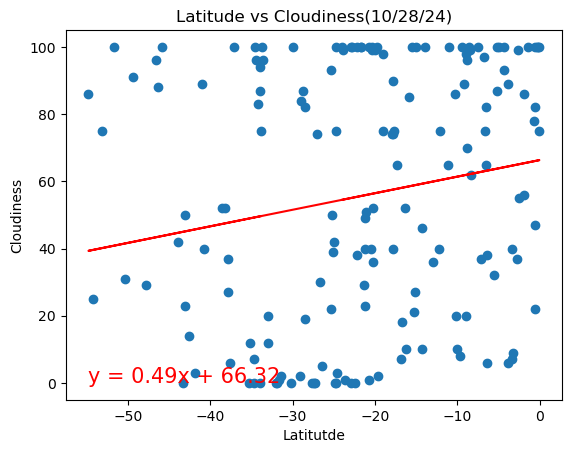

In [188]:
# Southern Hemisphere
lat_regression(southern_hem_df, "Cloudiness")

**Discussion about the linear relationship:** There is an increase in cloudiness when latutude increases for both the nothern and southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.017954926561015445


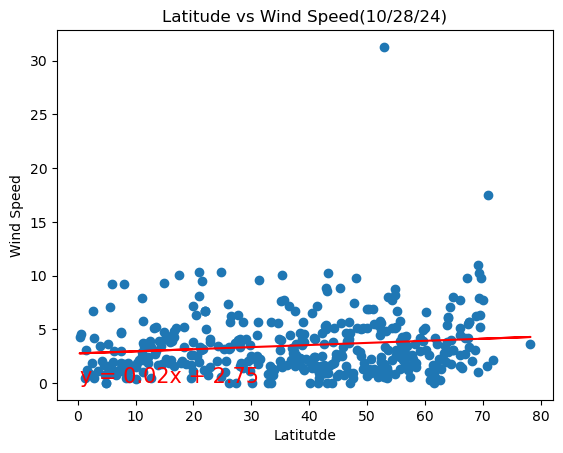

In [189]:
# Northern Hemisphere
lat_regression(northern_hem_df, "Wind Speed")

The r^2 value is: 0.08879325999319494


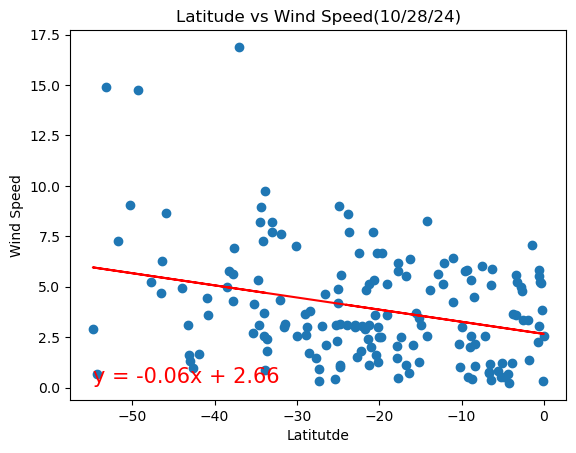

In [190]:
# Southern Hemisphere
lat_regression(southern_hem_df, "Wind Speed")

**Discussion about the linear relationship:** There is a negative correlation between the nothern and southern hemisphere when it comes to wind speed. The south has a negative correlaton compared to the north which is moderate. 